<a href="https://colab.research.google.com/github/mbenedict1822/Neuro_140_Final_Project/blob/master/Representational_Similarity_Analysis_Faces_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neuro 140 Final Project: Representational Simmilarity Analysis for Faces**
Michaela Benedict

---
Citations: Used [Machine Learning Mastery 1](https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/) as a basis to implement pre-trained VGGFace, [Machine Learning Mastery 2](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/) to extract neural network layers, and [Stack Overflow](https://stackoverflow.com/questions/40363277/import-matlab-cell-array-into-python-for-scikit-learn) to upload matlab files to python.

# Initializing Packages

In [0]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_vggface
%tensorflow_version 1.x

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-scx838ds
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-scx838ds
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=bc24c1fd1db90971ab37f61077a74e927e68cb40d52e3448ccfbc035c632b34c
  Stored in directory: /tmp/pip-ephem-wheel-cache-brhmgruh/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface
TensorFlow 1.x selected.


In [0]:
import keras_vggface
import matplotlib
import PIL
import numpy
from numpy import asarray, expand_dims
from PIL import Image
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import pearsonr
from keras.applications.vgg16 import VGG16
from keras.engine import  Model
from keras.layers import Input, Flatten
from keras_vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from sklearn.manifold import MDS
from keras.applications.resnet50 import preprocess_input, decode_predictions
from google.colab import files

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Making RDMs

In [0]:
#Load Extracted Faces Once
lst = [13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24]
pixels = []
for i in range(len(lst)):
    # INPUT LOCATION WHERE EXTRACTED FACE IS STORED
    pixels.append(numpy.load('drive/My Drive/Neuro140/NewStimuli/newstimulus%d.tif.npy'%lst[i]))

In [0]:
#Make VGGFace RDMs
lst = [13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24]
master_flat_layers = []
model = VGGFace()
for h in range(len(lst)):
  flat_layers = []
  ixs = range(1, len(model.layers))
  outputs = [model.layers[i].output for i in ixs]
  model = Model(inputs=model.inputs, outputs=outputs)
  img = img_to_array(pixels[h])
  img = expand_dims(img, axis=0)
  img = preprocess_input(img)
  feature_maps = model.predict(img)
  for j in range(1, len(model.layers)-1):
    flat_features = feature_maps[j].flatten()
    flat_layers.append(flat_features)
  master_flat_layers.append(flat_layers)

In [0]:
#Save VGGFace RDMs
for j in range(len(model.layers)-2):
  layer_extract = []
  for i in range(len(master_flat_layers)):
    layer_extract.append(master_flat_layers[i][j])
  matrix = 1- numpy.corrcoef(layer_extract)
  # INPUT LOCATION WHERE YOU WILL SAVE RDMS
  filename = 'drive/My Drive/Neuro140/DefaultVGGFace/defaultVGGFacerdm%d.npy'%(j+1)
  numpy.save(filename, matrix)

In [0]:
#Display an RDM
sns.heatmap(matrix)

In [0]:
#Make VGG16 RDMs
lst = [13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24]
master_flat_layers = []
model = VGG16()
for h in range(len(lst)):
  flat_layers = []
  ixs = range(1, len(model.layers))
  outputs = [model.layers[i].output for i in ixs]
  model = Model(inputs=model.inputs, outputs=outputs)
  img = img_to_array(pixels[h])
  img = expand_dims(img, axis=0)
  img = preprocess_input(img)
  feature_maps = model.predict(img)
  for j in range(1, len(model.layers)-1):
    flat_features = feature_maps[j].flatten()
    flat_layers.append(flat_features)
  master_flat_layers.append(flat_layers)

In [0]:
#Save VGG16 RDMs
for j in range(len(model.layers)-2):
  layer_extract = []
  for i in range(len(master_flat_layers)):
    layer_extract.append(master_flat_layers[i][j])
  matrix = 1- numpy.corrcoef(layer_extract)
  # INPUT LOCATION WHERE YOU WILL SAVE RDMS
  filename = 'drive/My Drive/Neuro140/DefaultVGG16/defaultVGG16rdm%d.npy'%(j+1)
  numpy.save(filename, matrix)

In [0]:
#Make ResNet50 RDMs
lst = [13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24]
master_flat_layers = []
model = ResNet50(weights='imagenet')
for h in range(len(lst)):
  flat_layers = []
  ixs = range(1, len(model.layers))
  outputs = [model.layers[i].output for i in ixs]
  model = Model(inputs=model.inputs, outputs=outputs)
  img = img_to_array(pixels[h])
  img = expand_dims(img, axis=0)
  img = preprocess_input(img)
  feature_maps = model.predict(img)
  for j in range(1, len(model.layers)-1):
    flat_features = feature_maps[j].flatten()
    flat_layers.append(flat_features)
  master_flat_layers.append(flat_layers)

In [0]:
#Save Resnet50 RDMs
for j in range(len(model.layers)-2):
  layer_extract = []
  for i in range(len(master_flat_layers)):
    layer_extract.append(master_flat_layers[i][j])
  matrix = 1- numpy.corrcoef(layer_extract)
  # INPUT LOCATION WHERE YOU WILL SAVE RDMS
  filename = 'drive/My Drive/Neuro140/Resnet50/resnet50rdm%d.npy'%(j+1)
  numpy.save(filename, matrix)

In [0]:
#Make VGGFace Resnet50 RDMs
lst = [13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24]
master_flat_layers = []
model = VGGFace(model='resnet50')
for h in range(len(lst)):
  flat_layers = []
  ixs = range(1, len(model.layers))
  outputs = [model.layers[i].output for i in ixs]
  model = Model(inputs=model.inputs, outputs=outputs)
  img = img_to_array(pixels[h])
  img = expand_dims(img, axis=0)
  img = preprocess_input(img)
  feature_maps = model.predict(img)
  for j in range(1, len(model.layers)-1):
    flat_features = feature_maps[j].flatten()
    flat_layers.append(flat_features)
  master_flat_layers.append(flat_layers)

In [0]:
#Save VGGFace Resnet50 RDMs
for j in range(len(model.layers)-2):
  layer_extract = []
  for i in range(len(master_flat_layers)):
    layer_extract.append(master_flat_layers[i][j])
  matrix = 1- numpy.corrcoef(layer_extract)
  # INPUT LOCATION WHERE YOU WILL SAVE RDMS
  filename = 'drive/My Drive/Neuro140/VGGFaceResnet50/VGGfaceresnet50rdm%d.npy'%(j+1)
  numpy.save(filename, matrix)

# Load RDMs

In [0]:
#Load CNN Matrices
VGGFace_matrices = []
VGG16_matrices = []
for i in range(1,20):
    # INPUT LOCATION WHERE MATRICES ARE STORED
    VGGFace_matrices.append(numpy.load('drive/My Drive/Neuro140/DefaultVGGFace/defaultVGGFacerdm%d.npy'%(i)))
    VGG16_matrices.append(numpy.load('drive/My Drive/Neuro140/DefaultVGG16/defaultVGG16rdm%d.npy'%(i)))
VGGFace50_matrices = []
Resnet50_matrices = []
for i in range(1,173):
    # INPUT LOCATION WHERE MATRICES ARE STORED
    VGGFace50_matrices.append(numpy.load('drive/My Drive/Neuro140/VGGFaceResnet50/VGGfaceresnet50rdm%d.npy'%(i)))
    Resnet50_matrices.append(numpy.load('drive/My Drive/Neuro140/Resnet50/resnet50rdm%d.npy'%(i)))

In [0]:
#Get layer names =VGG16 (for graph labels)
model = VGG16()
layernames16 = []
for layer in model.layers:
  layernames16.append(layer.name)
layernames16 = layernames16[1:20]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 33s 0us/step


In [0]:
#Get layer names Resnet50 (for graph labels)
model = VGGFace(model='resnet50')
layernames50 = []
for layer in model.layers:
  layernames50.append(layer.name)
layernames50 = layernames50[1:173]


165445632/165439116 [==============================] - 11s 0us/step


In [0]:
#Load FMRI Matrices
FMRImatrices = {}
subjects = ['KO', 'SN', 'TI']
areanames = ['leftFFA', 'rightFFA', 'leftPPA', 'rightPPA']
for i in range(len(subjects)):
  for j in range(len(areanames)):
    # INPUT LOCATION WHERE MATRICES ARE STORED
    filename = 'drive/My Drive/Neuro140/%s%s.npy'%(subjects[i], areanames[j])
    name = '%s%s'%(subjects[i], areanames[j])
    FMRImatrices[name] = numpy.load(filename)

# Calculate Dissimilarity Neural Net vs fMRI

In [0]:
#Made dictionary of dissimilarities VGG16 Face Trained
Dissimdict16 = {}
Pvaldict16 = {}
for key, matrix in FMRImatrices.items():
  dissimlist = []
  pvallist = []
  for j in range(0, 19):
    rdm1 = VGGFace_matrices[j][numpy.triu_indices(11, k=1)].flatten()
    rdm2 = matrix[numpy.triu_indices(11, k=1)].flatten()
    dissimilarity, pval = pearsonr(rdm1, rdm2)
    dissimlist.append(dissimilarity)
    pvallist.append(pval)
  Dissimdict16[key] = dissimlist
  Pvaldict16[key] = pvallist

In [0]:
#Made dictionary of dissimilarities Resnet50 Face Trained
Dissimdict50 = {}
Pvaldict50 = {}
for key, matrix in FMRImatrices.items():
  dissimlist = []
  pvallist = []
  for j in range(0, 172):
    rdm1 = VGGFace50_matrices[j][numpy.triu_indices(11, k=1)].flatten()
    rdm2 = matrix[numpy.triu_indices(11, k=1)].flatten()
    dissimilarity, pval = pearsonr(rdm1, rdm2)
    dissimlist.append(dissimilarity)
    pvallist.append(pval)
  Dissimdict50[key] = dissimlist
  Pvaldict50[key] = pvallist

In [0]:
#Made dictionary of dissimilarities VGG16 Non Face Trained
Dissimdict16new = {}
Pvaldict16new = {}
for key, matrix in FMRImatrices.items():
  dissimlist = []
  pvallist = []
  for j in range(0, 19):
    rdm1 = VGG16_matrices[j][numpy.triu_indices(11, k=1)].flatten()
    rdm2 = matrix[numpy.triu_indices(11, k=1)].flatten()
    dissimilarity, pval = pearsonr(rdm1, rdm2)
    dissimlist.append(dissimilarity)
    pvallist.append(pval)
  Dissimdict16new[key] = dissimlist
  Pvaldict16new[key] = pvallist

In [0]:
#Made dictionary of dissimilarities Resnet50 Face Trained
Dissimdict50new = {}
Pvaldict50new = {}
for key, matrix in FMRImatrices.items():
  dissimlist = []
  pvallist = []
  for j in range(0, 172):
    rdm1 = Resnet50_matrices[j][numpy.triu_indices(11, k=1)].flatten()
    rdm2 = matrix[numpy.triu_indices(11, k=1)].flatten()
    dissimilarity, pval = pearsonr(rdm1, rdm2)
    dissimlist.append(dissimilarity)
    pvallist.append(pval)
  Dissimdict50new[key] = dissimlist
  Pvaldict50new[key] = pvallist

## Non-Face Trained Graphs

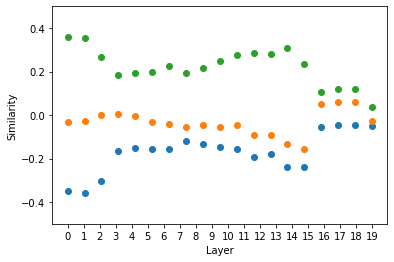

In [0]:
# VGGFace vs left FFA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('KOleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('SNleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('TIleftFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftFFA_VGG_Nonface.png")
files.download("leftFFA_VGG_Nonface.png") 

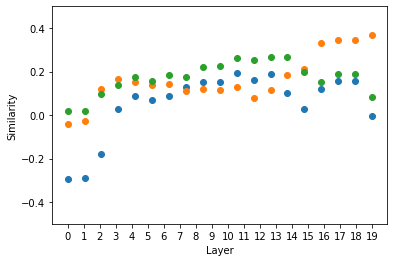

In [0]:
# VGGFace vs right FFA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('KOrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('SNrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('TIrightFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightFFA_VGG_Nonface.png")
files.download("rightFFA_VGG_Nonface.png") 

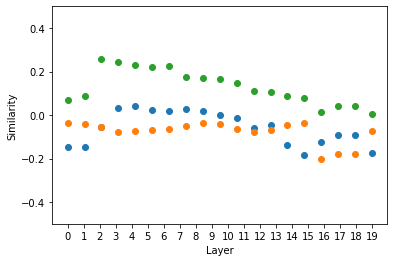

In [0]:
# VGGFace vs left PPA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('KOleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('SNleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('TIleftPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftPPA_VGG_Nonface.png")
files.download("leftPPA_VGG_Nonface.png") 

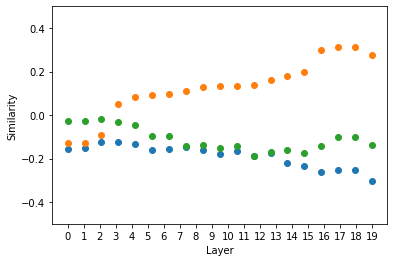

In [0]:
# VGGFace vs right PPA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('KOrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('SNrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16new.get('TIrightPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightPPA_VGG_Nonface.png")
files.download("rightPPA_VGG_Nonface.png") 

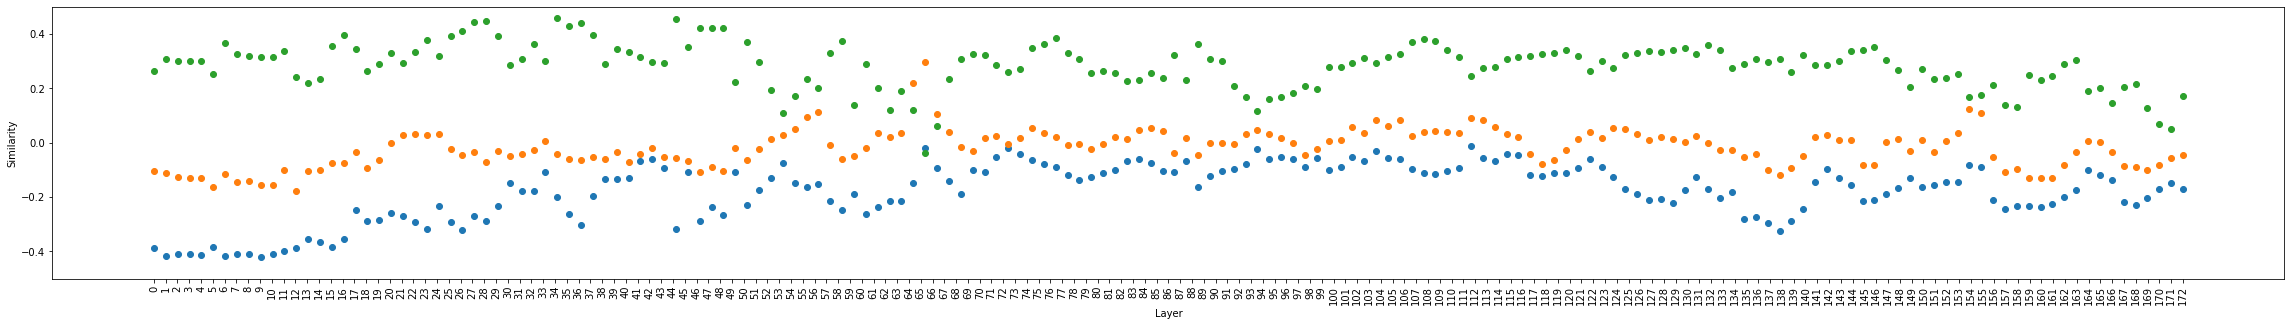

In [0]:
# Resnet(face trained) vs left FFA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('KOleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('SNleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('TIleftFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftFFA_Resnet_Nonface.png")
files.download("leftFFA_Resnet_Nonface.png") 

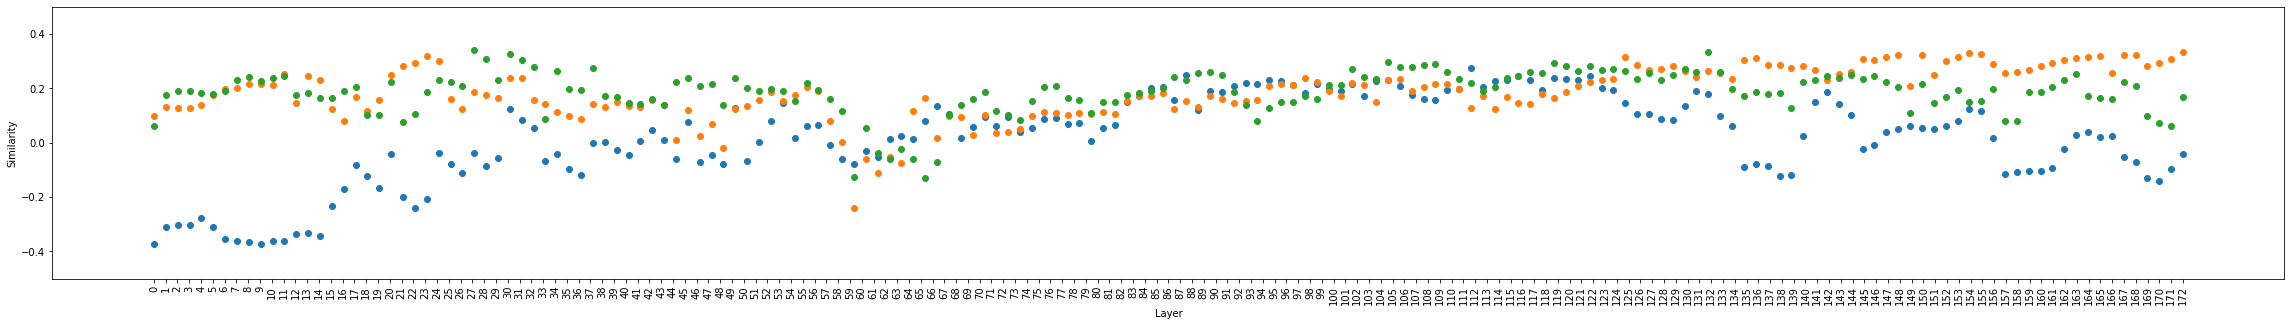

In [0]:
# Resnet(face trained) vs right FFA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('KOrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('SNrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('TIrightFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightFFA_Resnet_Nonface.png")
files.download("rightFFA_Resnet_Nonface.png")

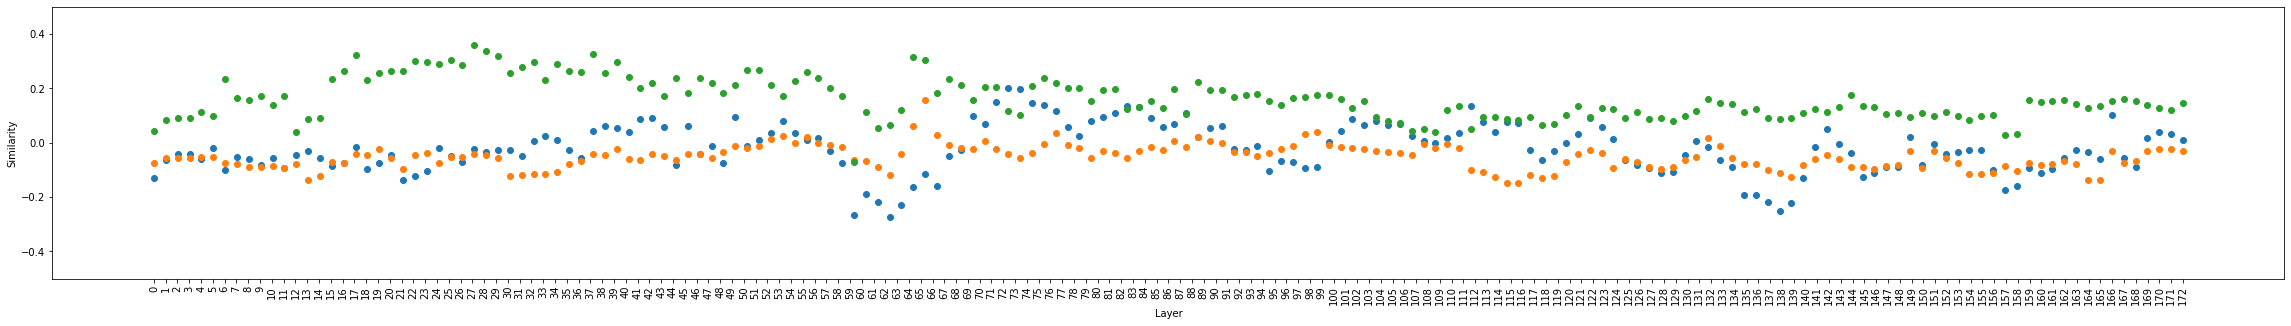

In [0]:
# Resnet(face trained) vs left PPA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('KOleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('SNleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('TIleftPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftPPA_Resnet_Nonface.png")
files.download("leftPPA_Resnet_Nonface.png")

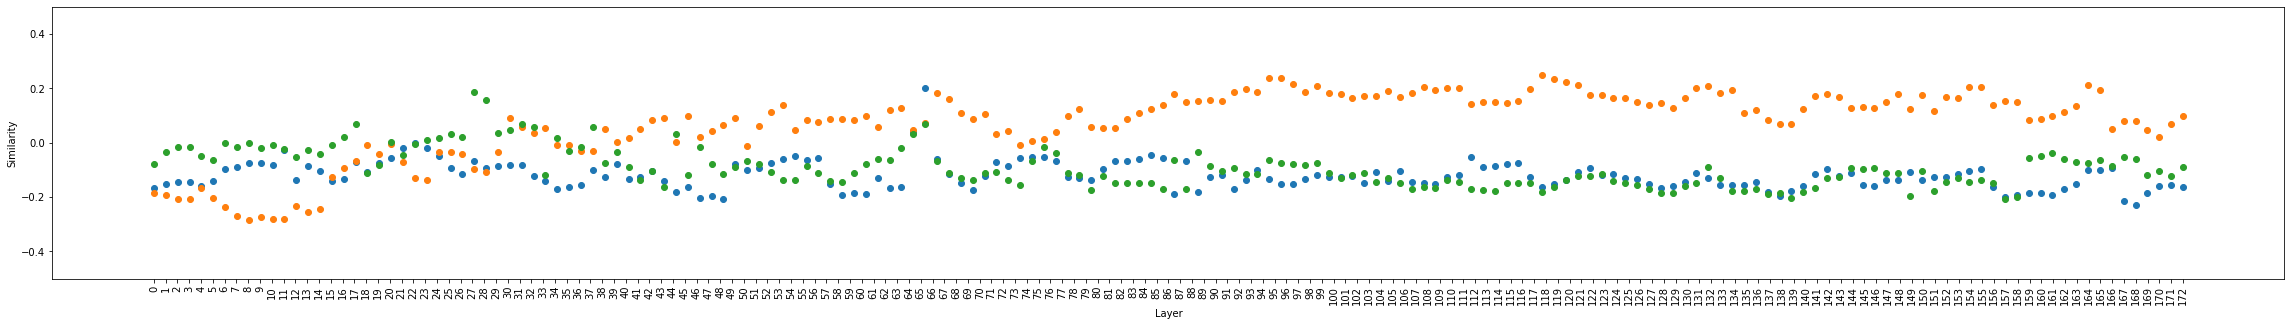

In [0]:
# Resnet(face trained) vs right PPA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('KOrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('SNrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50new.get('TIrightPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightPPA_Resnet_Nonface.png")
files.download("rightPPA_Resnet_Nonface.png")

## Face Trained Graphs

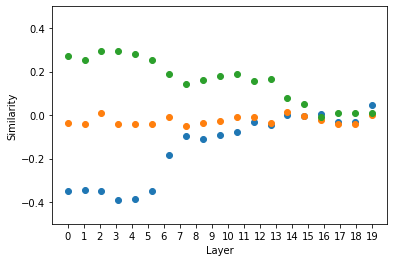

In [0]:
# VGGFace vs left FFA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('KOleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('SNleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('TIleftFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftFFA_VGG_Face.png")
files.download("leftFFA_VGG_Face.png") 

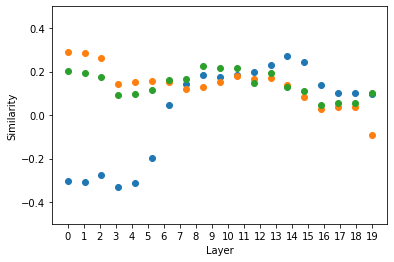

In [0]:
# VGGFace vs right FFA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('KOrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('SNrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('TIrightFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightFFA_VGG_Face.png")
files.download("rightFFA_VGG_Face.png") 

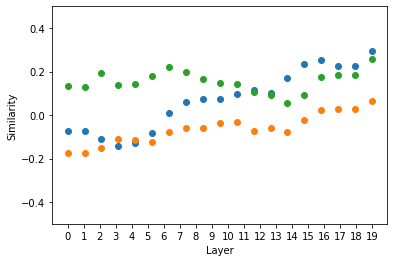

In [0]:
# VGGFace vs left PPA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('KOleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('SNleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('TIleftPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftPPA_VGG_Face.png")
files.download("leftPPA_VGG_Face.png") 

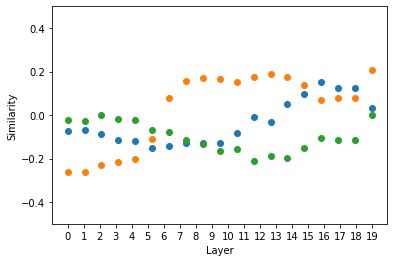

In [0]:
# VGGFace vs right PPA
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('KOrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('SNrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Dissimdict16.get('TIrightPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightPPA_VGG_Face.png")
files.download("rightPPA_VGG_Face.png") 

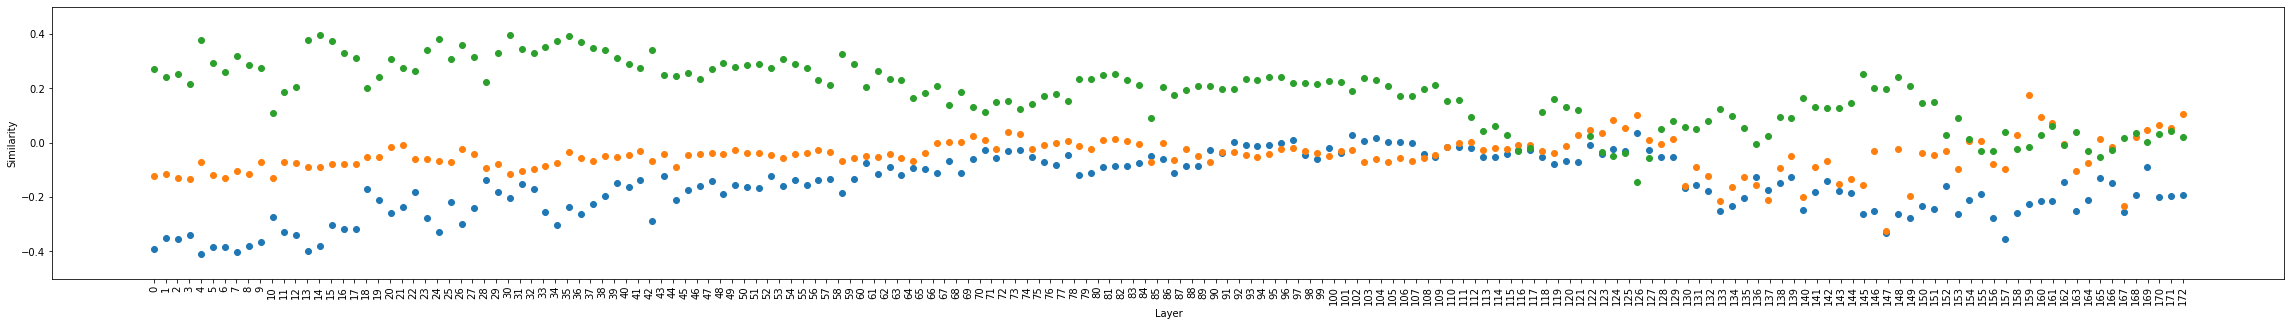

In [0]:
# Resnet(face trained) vs left FFA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('KOleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('SNleftFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('TIleftFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftFFA_Resnet_Face.png")
files.download("leftFFA_Resnet_Face.png") 

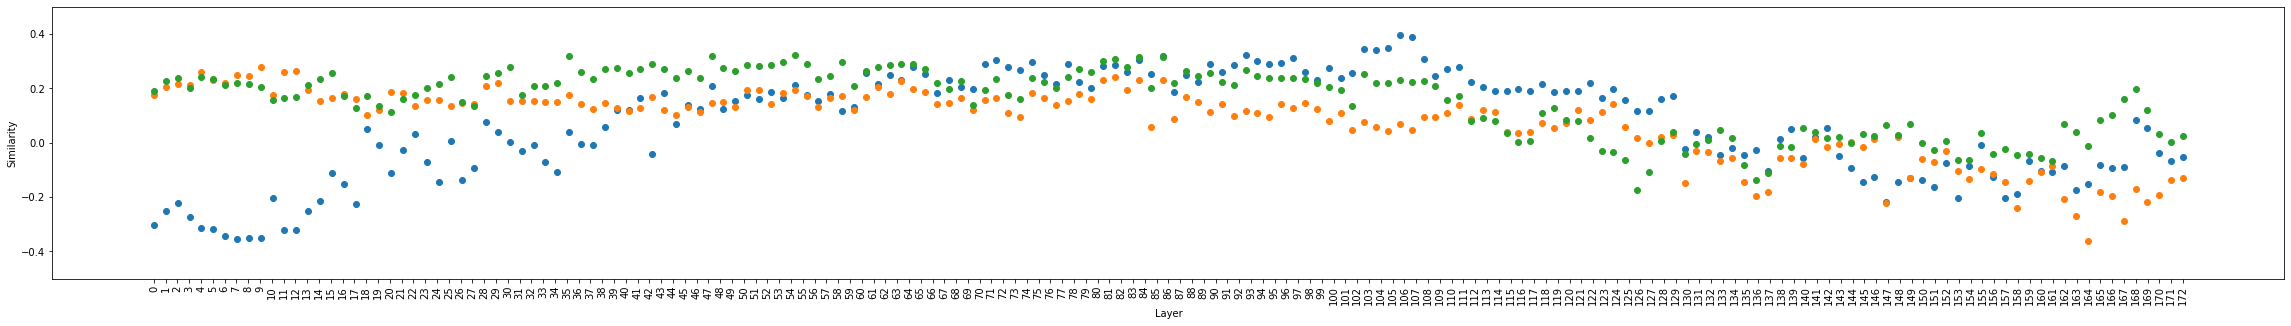

In [0]:
# Resnet(face trained) vs right FFA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('KOrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('SNrightFFA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('TIrightFFA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightFFA_Resnet_Face.png")
files.download("rightFFA_Resnet_Face.png")

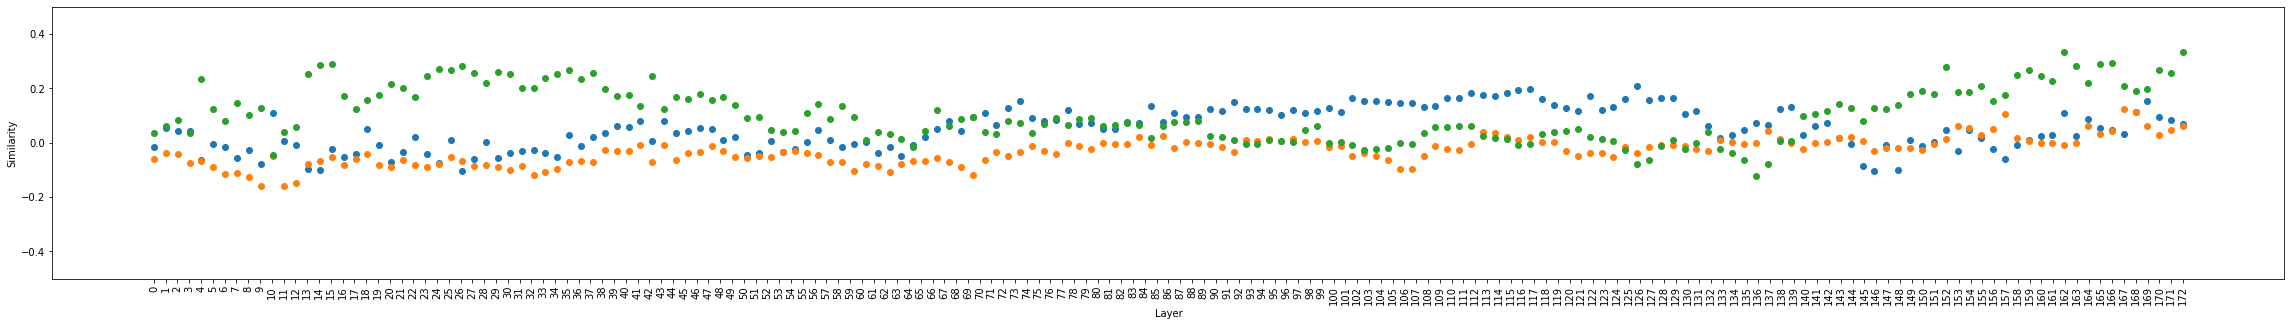

In [0]:
# Resnet(face trained) vs left PPA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('KOleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('SNleftPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('TIleftPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("leftPPA_Resnet_Face.png")
files.download("leftPPA_Resnet_Face.png")

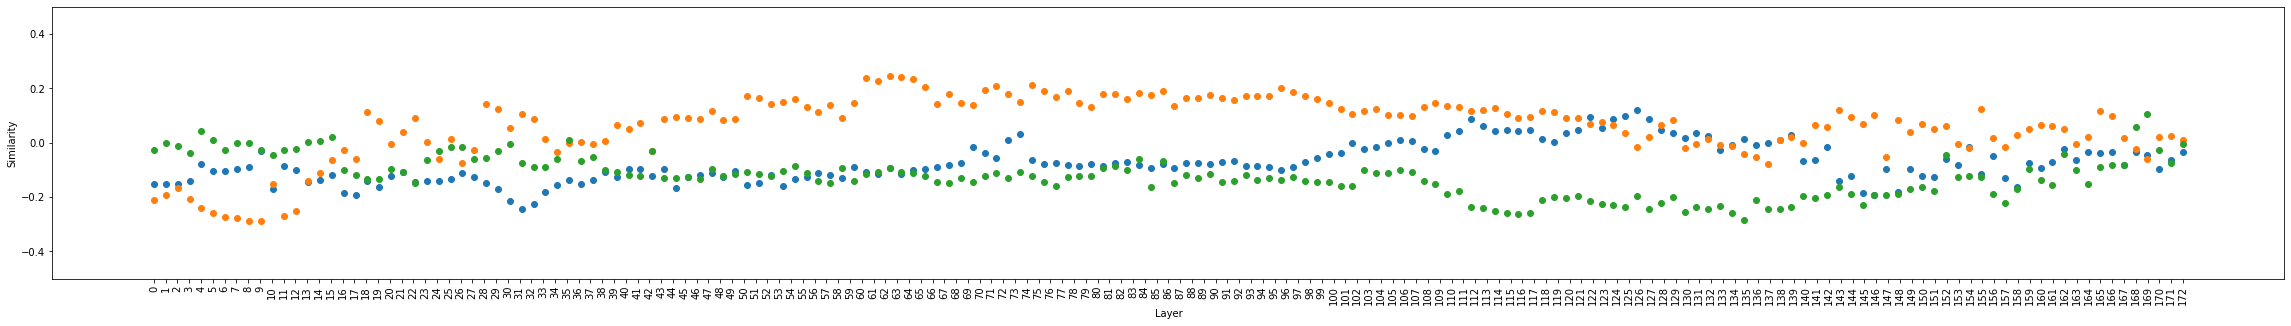

In [0]:
# Resnet(face trained) vs right PPA
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('KOrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('SNrightPPA'))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Dissimdict50.get('TIrightPPA'))
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.ylim(top=0.5)
matplotlib.pyplot.ylim(bottom=-0.5)
matplotlib.pyplot.savefig("rightPPA_Resnet_Face.png")
files.download("rightPPA_Resnet_Face.png")

# Face vs Non-Face Training

In [0]:
#Made list of dissimilarities VGG16
Face16Dissimilarity = []
Face16Pval = []
for i in range(0, 19):
  rdm1 = VGGFace_matrices[i][numpy.triu_indices(11, k=1)].flatten()
  rdm2 = VGG16_matrices[i][numpy.triu_indices(11, k=1)].flatten()
  dissimilarity, pval = pearsonr(rdm1, rdm2)
  Face16Dissimilarity.append(dissimilarity)
  Face16Pval.append(pval)

In [0]:
#Made list of dissimilarities Resnet50
Face50Dissimilarity = []
Face50Pval = []
for i in range(0, 172):
  rdm1 = VGGFace50_matrices[i][numpy.triu_indices(11, k=1)].flatten()
  rdm2 = Resnet50_matrices[i][numpy.triu_indices(11, k=1)].flatten()
  dissimilarity, pval = pearsonr(rdm1, rdm2)
  Face50Dissimilarity.append(dissimilarity)
  Face50Pval.append(pval)

## Graphs

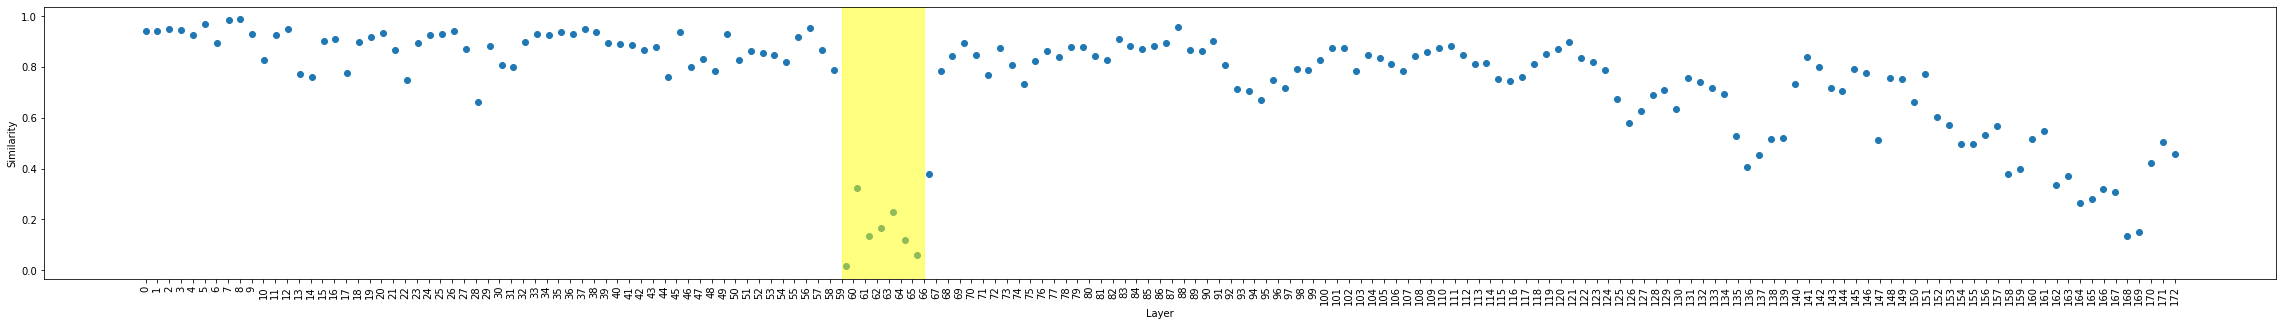

In [0]:
# Face vs Non-Face Trained Resnet50
matplotlib.pyplot.figure(figsize=(40,5))
matplotlib.pyplot.scatter(numpy.linspace(0, 172, num=172), Face50Dissimilarity)
numbers = [ int(x) for x in numpy.linspace(0, 172, num=173) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.axvspan(59, 66, alpha=0.5, color='yellow')
matplotlib.pyplot.savefig("Resnet_Comparison.png")
files.download("Resnet_Comparison.png")

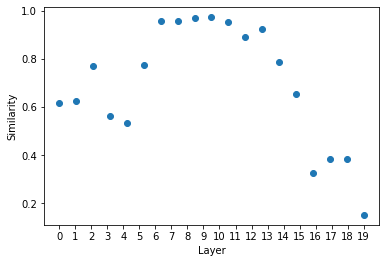

In [0]:
# Face vs Non-Face Trained VGG16
matplotlib.pyplot.scatter(numpy.linspace(0, 19, num=19), Face16Dissimilarity)
numbers = [ int(x) for x in numpy.linspace(0, 19, num=20) ]
matplotlib.pyplot.xticks(numbers)
matplotlib.pyplot.xlabel("Layer")
matplotlib.pyplot.ylabel("Similarity")
matplotlib.pyplot.savefig("VGG_Comparison.png")
files.download("VGG_Comparison.png")